In [1]:

%pprint
%run ../py/storage.py

s = Storage()
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])

Pretty printing has been turned OFF
['s.attempt_to_pickle', 's.csv_exists', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.pickle_exists', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


In [2]:

file_path = os.path.join(s.data_folder, 'txt', 'Net_Worth_by_Date.txt')
with open(file_path, 'r', encoding='utf-8') as f:
    export_str = f.read()

In [3]:

from datetime import datetime
import re

lines_list = export_str.split('\n')[1:-1]
currency_regex = re.compile('[^0-9.-]+')
rows_list = []
for date_str, worth_str in zip(lines_list[::2], lines_list[1::2]):
    row_dict = {}
    datetime_obj = datetime.strptime(date_str, '- %A, %B %d, %Y')
    row_dict['date'] = datetime_obj
    net_worth = float(currency_regex.sub('', worth_str))
    row_dict['net_worth'] = net_worth
    rows_list.append(row_dict)

In [10]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

from scipy.optimize import curve_fit
import numpy as np
import math
%matplotlib inline

def func(x, a, b):

    return a*x + b

net_worth_df = pd.DataFrame(rows_list).set_index('date')
popt, pcov = curve_fit(func, [nw_date.timestamp() for nw_date in net_worth_df.index],
                       [float(net_worth) for net_worth in net_worth_df.net_worth])

def get_net_worth(date_numeric):
    '''Get the net worth given a numeric representation of the date'''

    return round(popt[0]*date_numeric + popt[1], 2)

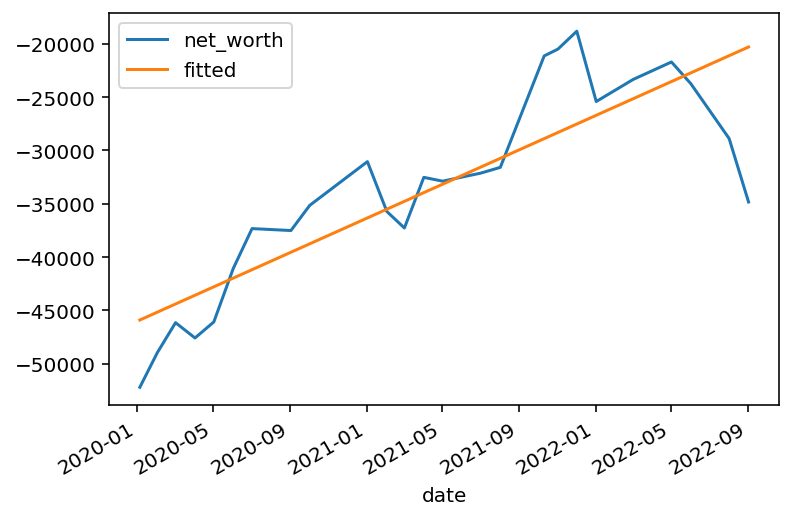

In [11]:

net_worth_df['fitted'] = net_worth_df.index.map(lambda x: get_net_worth(x.timestamp()))
net_worth_df.plot.line();

In [12]:

net_worth = 0
datetime.fromtimestamp((net_worth - popt[1]) / popt[0]).strftime('%A, %B %d, %Y')

'Wednesday, October 09, 2024'

y0 = ($52,058.90)
yp = ($22,696.14)
k = 0.0000000329



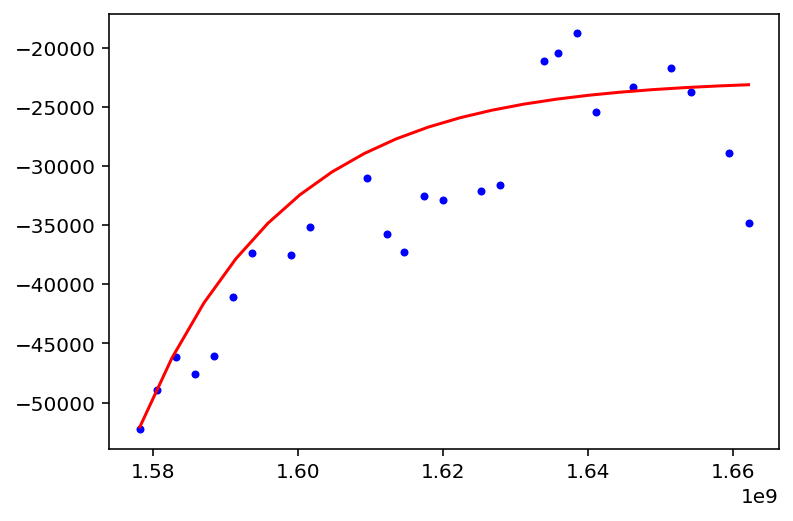

In [64]:

import pylab as pl
from scipy.optimize.minpack import curve_fit
import locale

x = np.array([nw_date.timestamp() for nw_date in net_worth_df.index])
X0 = x[0]
y = np.array([float(net_worth) for net_worth in net_worth_df.net_worth])

smoothx = np.linspace(X0, x[-1], 20)

exp_decay = lambda x, y0, yp, k: y0 + (yp - y0) * (1 - np.exp(-k * (x-X0)))

guess_y0, guess_yp, guess_k = -52_058.89331285476, -22_696.12996875458, 3.286653916621955e-08
params, cov = curve_fit(exp_decay, x, y, p0=[guess_y0, guess_yp, guess_k])

y0, yp, k = params

locale.setlocale(locale.LC_ALL, 'en_US')
print(f'y0 = {locale.currency(y0, grouping=True)}\nyp = {locale.currency(yp, grouping=True)}\nk = {k:,.10f}\n')

pl.clf()
best_fit = lambda x: y0 + (yp - y0) * (1 - np.exp(-K * (x-X0)))

pl.plot(x, y, 'b.')
pl.plot(smoothx, best_fit(smoothx), 'r-');